# House Price Prediction v2.0

## Basic Info about Kernel:   
1. problem type : regression pro
2. Data Type : train.csv, test.csv
3. target : Predict SalePrice

## 1: Import lib we may need

In [69]:
# data processing package
import numpy as np
import pandas as pd

#visualisation package
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', context='notebook', palette='deep')
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)

#Stastic Tool package for transformation
from scipy import stats
from scipy.stats import skew,norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr

#Model package



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2: Data input & Overview

In [70]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [71]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
train.shape

(1460, 81)

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [74]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [75]:
test.shape

(1459, 80)

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

## 3: Data preprocessing 

### (1)Depart Feature 'Id' 

**Before all, Depart feature "Id" ,for it's no usage for prediction,but it will be used for submission.**

In [77]:
train_id = train['Id']
test_id = test['Id']

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

### (2)Outliers

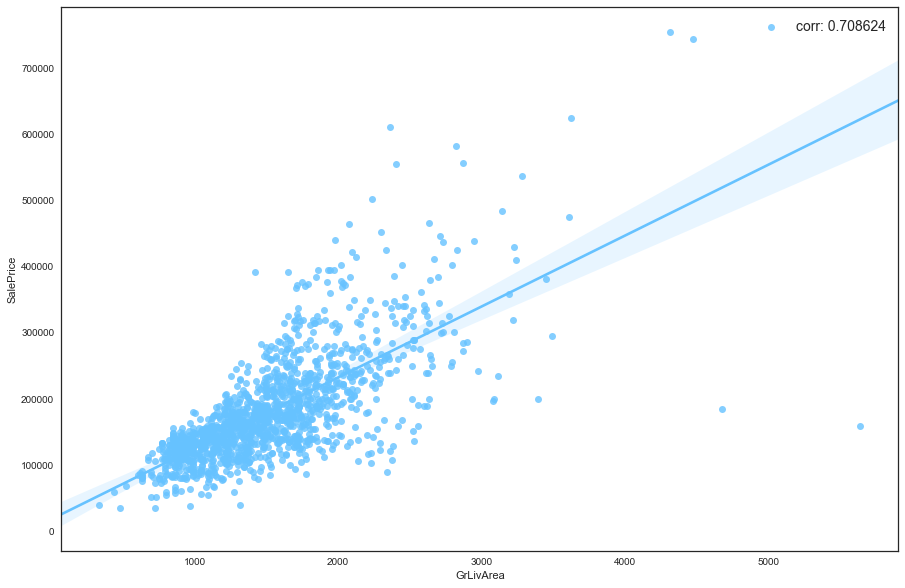

In [78]:
plt.subplots(figsize=(15,10))
g = sns.regplot(x='GrLivArea', y='SalePrice', data=train, label='corr: %2f'
                %(pearsonr(train['GrLivArea'], train['SalePrice'])[0]))
g.legend(loc='best', fontsize=14)
plt.show()

In [79]:
train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index, inplace=True)

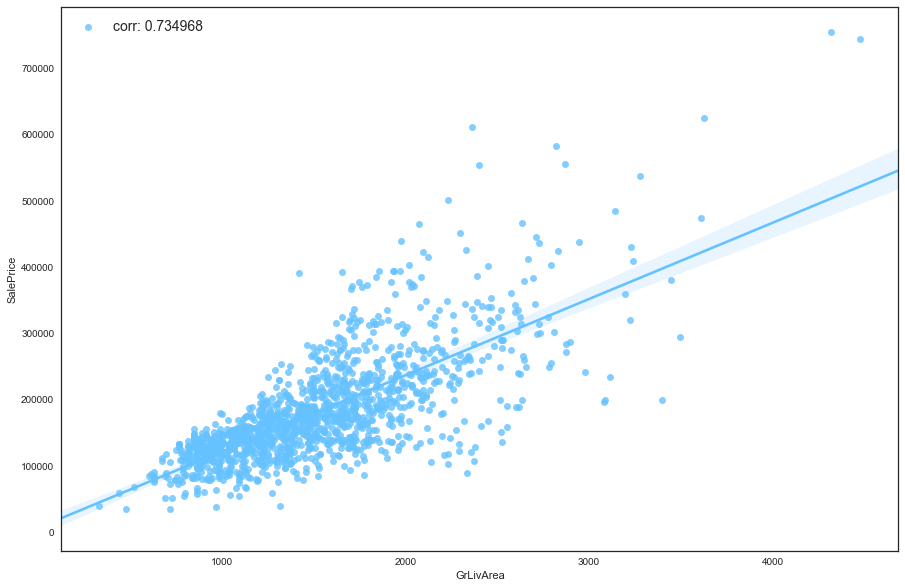

In [80]:
plt.subplots(figsize=(15,10))
g = sns.regplot(x='GrLivArea', y='SalePrice', data=train, label='corr: %2f'
                %(pearsonr(train['GrLivArea'], train['SalePrice'])[0]))
g.legend(loc='best', fontsize=14)
plt.show()

### (3)Getting all_data

** (1)concat train and test to get all_data, for data processing and feature engineer   
      record the number of train and test, and target feature in train**

In [81]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop('SalePrice', axis=1, inplace=True)

In [82]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [83]:
all_data.shape

(2917, 79)

In [84]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

### (4)Handle missing values 

Find all missing value and its ratio

In [85]:
all_data_na = all_data.isnull().sum()
all_data_na = all_data_na.loc[all_data_na != 0].sort_values(ascending=False)
all_data_na_rate = all_data_na / len(all_data)

missing_data = pd.DataFrame({'Missing_Count' : all_data_na, 'Missing_Rate' : all_data_na_rate})
missing_data

,Missing_Count,Missing_Rate
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageQual,159,0.054508
GarageCond,159,0.054508
GarageFinish,159,0.054508
GarageYrBlt,159,0.054508


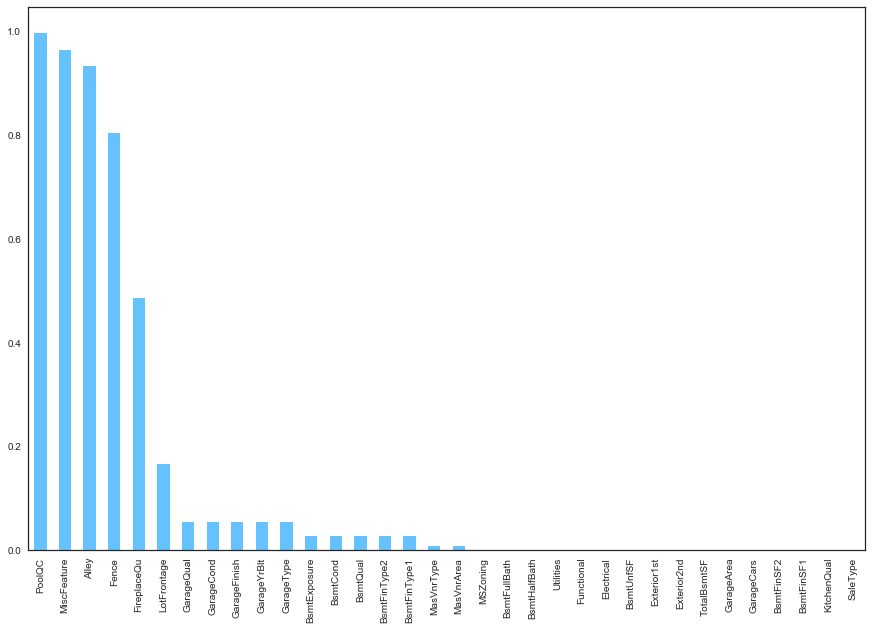

In [86]:
plt.subplots(figsize=(15,10))
missing_data['Missing_Rate'].plot(kind='bar')
plt.show()

According to each Feature meaning fill missing value.

** 1. Na --> category None**   
    (1) PoolQC  
    (2) Alley   
    (3) Fence  
    (4) FireplaceQu  
    (5) GarageQual  
    (6) GarageCond  
    (7) GarageFinish  
    (8) GarageType  
    (9) BsmtExposure  
    (10) BsmtCond  
    (11) BsmtQual  
    (12) BsmtFinType2  
    (13) BsmtFinType1    
    (14) MasVnrType  
    (15) MiscFeature  
** 2. Na --> Numerical type 0**   
    (1) GarageYrBlt   
    (2) MasVnrArea  
      
** 3. Na --> Missing value indeed numerical type**   
    (2) LotFrontage  
    (3) BsmtUnfSF  
    (4) TotalBsmtSF   
    (5) GarageArea  
    (6) GarageCars  
    (7) BsmtFinSF2  
    (8) BsmtFinSF1  
    
** 4. Na --> Missing value indeed category type**   
    (1) MSZoning  
    (2) BsmtFullBath(bool)  
    (3) BsmtHalfBath(bool)  
    (4) Utilities  
    (5) Functional  
    (6) Electrical  
    (7) Exterior1st  
    (8) Exterior2nd  
    (9) KitchenQual    
    (10) SaleType  

In [87]:

na_none = ['PoolQC','Alley','Fence','FireplaceQu','GarageQual','GarageCond','GarageFinish','GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType','MiscFeature'] 
na_zero = ['GarageYrBlt', 'MasVnrArea']
na_missing_num = ['LotFrontage', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'BsmtFinSF2', 'BsmtFinSF1']
na_missing_cate = ['MSZoning', 'Functional', 'Electrical', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
na_missing_bool = ['BsmtFullBath', 'BsmtHalfBath']
 
for col in na_none:
    all_data[col] = all_data[col].fillna('None')

for col in na_zero:
    all_data[col] = all_data[col].fillna(0)
    
for col in na_missing_cate:
    all_data[col] = all_data.fillna(all_data[col].mode()[0])
    
for col in na_missing_num:
    all_data[col] = all_data[col].fillna(all_data[col].median())
    
for col in na_missing_bool:
    all_data[col] = all_data[col].fillna(1 if all_data[col].mean()>0.5 else 0)

In [88]:
_na = all_data.isnull().sum()

In [89]:
_na.drop(_na[_na==0].index)

Utilities    2
dtype: int64

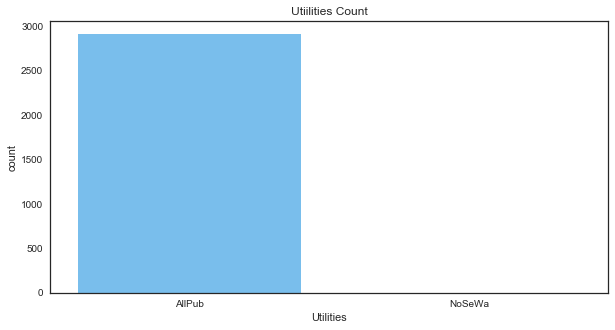

In [90]:
plt.subplots(figsize=(10,5))

g = sns.countplot(all_data['Utilities']).set_title('Utiilities Count')


In [91]:
# Drop the Feature 'Utilities'
all_data.drop(['Utilities'], axis=1, inplace=True)

In [92]:
_na = all_data.isnull().sum()

In [93]:
_na.drop(_na[_na==0].index)

Series([], dtype: int64)

** Missing Value Handling is complete! **

## 4: Feature Engineering

### (1)Correlation Matrix : 

1. Using this correlation matrix, I am able to visualise the raw highly influencing factors on SalePrice.
2. Create polynomial features from the highly correlating features, in an attempt to capture the complex non-linear relationships within the data.

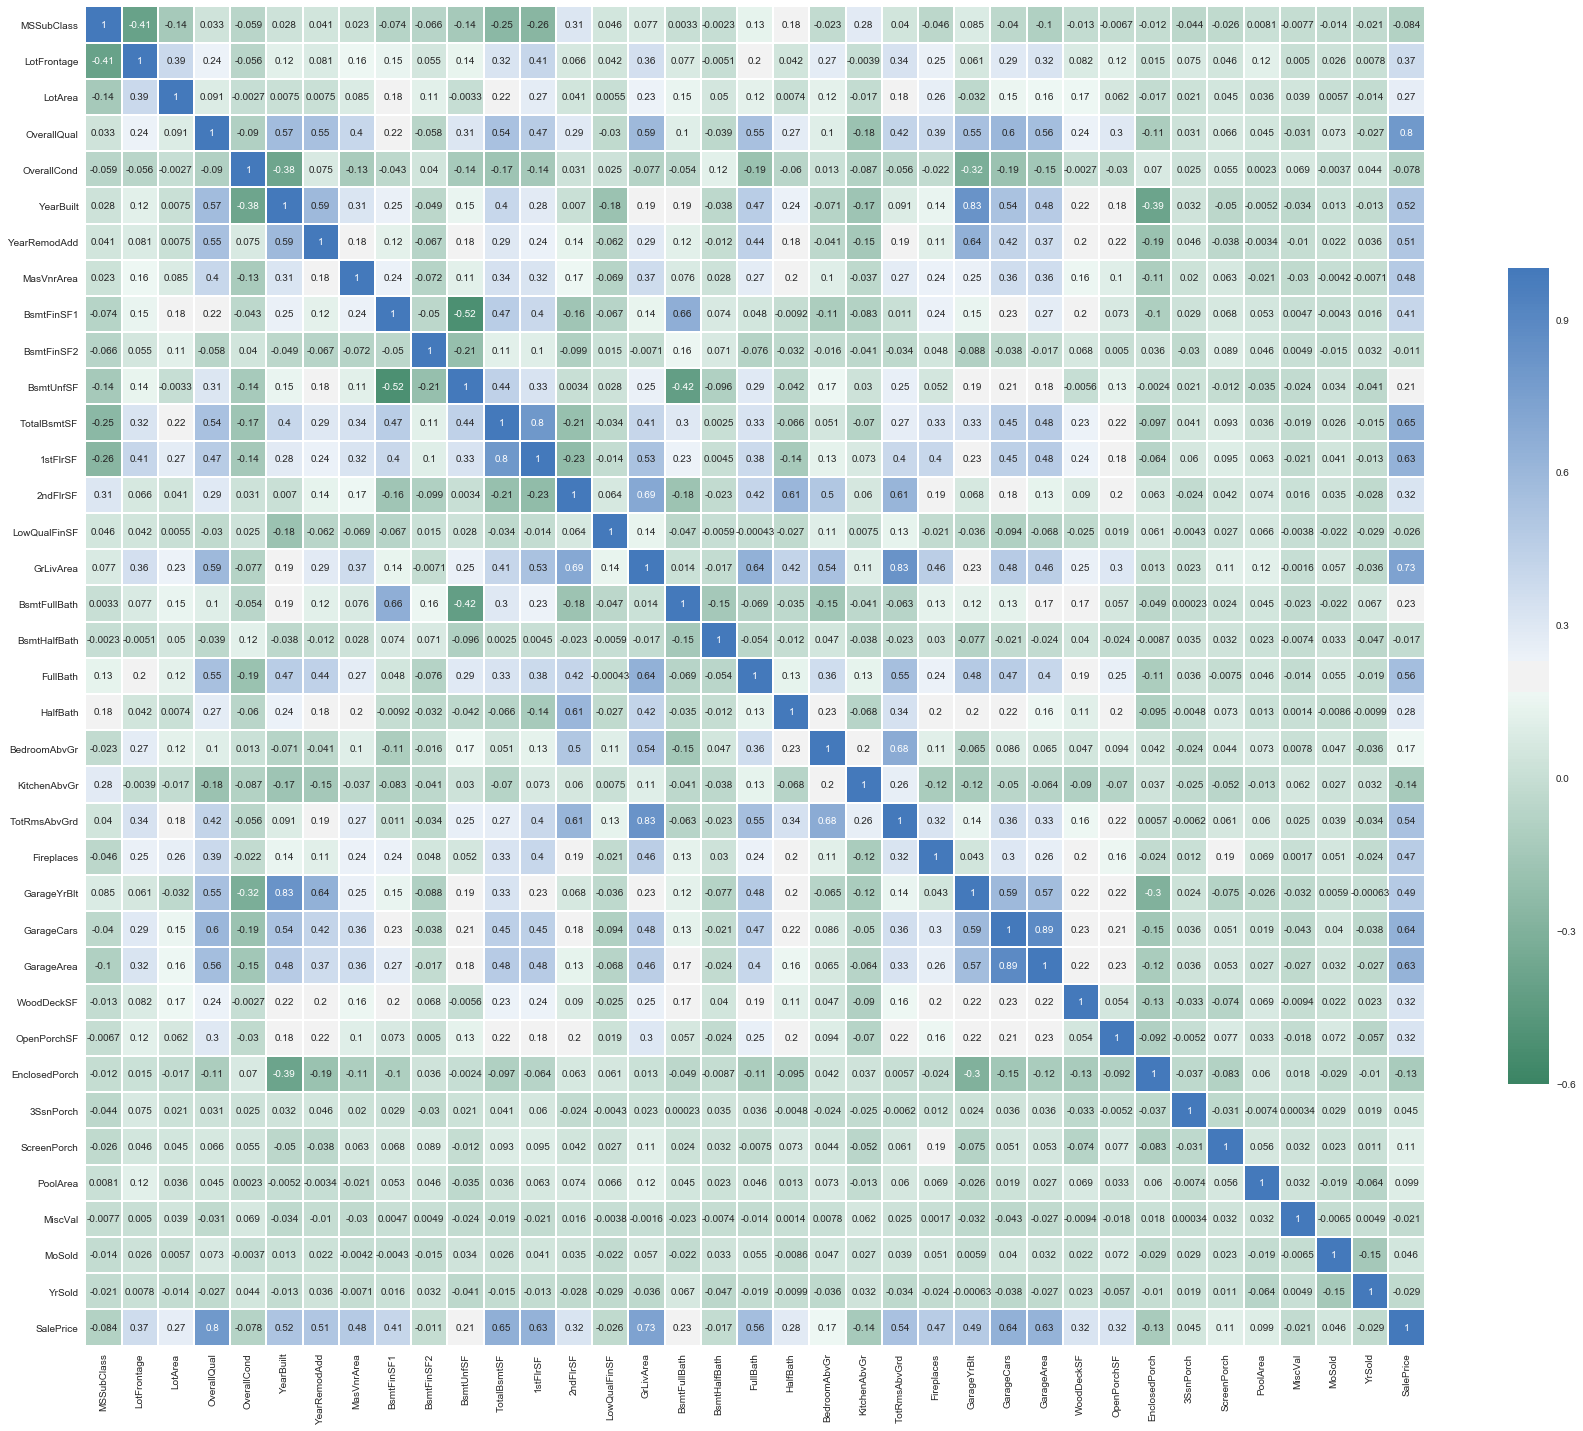

In [94]:
corr = train.corr()
plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=1, cbar_kws={"shrink": .5}, annot = True)

In [95]:
high_corr = []
for col in corr.columns:
    for val in corr[col].index:
        if (corr[col][val] >= 0.7) & (col != val):
            high_corr.append((col, val, corr[col][val]))

In [96]:
high_corr

[('OverallQual', 'SalePrice', 0.79577426742494406),
 ('YearBuilt', 'GarageYrBlt', 0.82531686174497187),
 ('TotalBsmtSF', '1stFlrSF', 0.80382962792561374),
 ('1stFlrSF', 'TotalBsmtSF', 0.80382962792561374),
 ('GrLivArea', 'TotRmsAbvGrd', 0.82949819767153865),
 ('GrLivArea', 'SalePrice', 0.73496816453593428),
 ('TotRmsAbvGrd', 'GrLivArea', 0.82949819767153865),
 ('GarageYrBlt', 'YearBuilt', 0.82531686174497187),
 ('GarageCars', 'GarageArea', 0.88730449839192049),
 ('GarageArea', 'GarageCars', 0.88730449839192049),
 ('SalePrice', 'OverallQual', 0.79577426742494406),
 ('SalePrice', 'GrLivArea', 0.73496816453593428)]

In [97]:
 corr['SalePrice'].sort_values(ascending=False).loc[corr['SalePrice']>=0.3]

SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
YearRemodAdd    0.507717
GarageYrBlt     0.487156
MasVnrArea      0.482719
Fireplaces      0.469862
BsmtFinSF1      0.409384
LotFrontage     0.370584
WoodDeckSF      0.324758
OpenPorchSF     0.321142
2ndFlrSF        0.320532
Name: SalePrice, dtype: float64

** NOTE : corr() is just used for numerical type, some Features, however, is appeared to be the numerical type**  
** Such as : Time Serise type, Bool type..., Although these features's value can calculate corr(), It's no sence!**  
** So , when we meet these types of feature , Droping them from corr matrix. **

In this set: YearBuilt, YearRemodAdd, GarageYrBlt are belong to time Serise   
             HalfBath is belong to bool type
So, we choose to Drop them.

In [98]:
corr.loc[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

Droping features mentioned above, we have 15 features tighly related with SalePrice totally.

### (2) Polynomials

Select 15 high corr features with target Feature SalePrice.  
Then Creat new features about Polynomials on them

In [99]:
# Quadratic

all_data["OverallQual-2"] = all_data["OverallQual"] ** 2
all_data["GrLivArea-2"] = all_data["GrLivArea"] ** 2
all_data["GarageCars-2"] = all_data["GarageCars"] ** 2
all_data["GarageArea-2"] = all_data["GarageArea"] ** 2
all_data["TotalBsmtSF-2"] = all_data["TotalBsmtSF"] ** 2
all_data["1stFlrSF-2"] = all_data["1stFlrSF"] ** 2
all_data["FullBath-2"] = all_data["FullBath"] ** 2
all_data["TotRmsAbvGrd-2"] = all_data["TotRmsAbvGrd"] ** 2
all_data["Fireplaces-2"] = all_data["Fireplaces"] ** 2
all_data["MasVnrArea-2"] = all_data["MasVnrArea"] ** 2
all_data["BsmtFinSF1-2"] = all_data["BsmtFinSF1"] ** 2
all_data["LotFrontage-2"] = all_data["LotFrontage"] ** 2
all_data["WoodDeckSF-2"] = all_data["WoodDeckSF"] ** 2
all_data["OpenPorchSF-2"] = all_data["OpenPorchSF"] ** 2
all_data["2ndFlrSF-2"] = all_data["2ndFlrSF"] ** 2

In [100]:
# Cubic

all_data["OverallQual-3"] = all_data["OverallQual"] ** 3
all_data["GrLivArea-3"] = all_data["GrLivArea"] ** 3
all_data["GarageCars-3"] = all_data["GarageCars"] ** 3
all_data["GarageArea-3"] = all_data["GarageArea"] ** 3
all_data["TotalBsmtSF-3"] = all_data["TotalBsmtSF"] ** 3
all_data["1stFlrSF-3"] = all_data["1stFlrSF"] ** 3
all_data["FullBath-3"] = all_data["FullBath"] ** 3
all_data["TotRmsAbvGrd-3"] = all_data["TotRmsAbvGrd"] ** 3
all_data["Fireplaces-3"] = all_data["Fireplaces"] ** 3
all_data["MasVnrArea-3"] = all_data["MasVnrArea"] ** 3
all_data["BsmtFinSF1-3"] = all_data["BsmtFinSF1"] ** 3
all_data["LotFrontage-3"] = all_data["LotFrontage"] ** 3
all_data["WoodDeckSF-3"] = all_data["WoodDeckSF"] ** 3
all_data["OpenPorchSF-3"] = all_data["OpenPorchSF"] ** 3
all_data["2ndFlrSF-3"] = all_data["2ndFlrSF"] ** 3

In [101]:
# Square Root

all_data["OverallQual-Sq"] = np.sqrt(all_data["OverallQual"])
all_data["GrLivArea-Sq"] = np.sqrt(all_data["GrLivArea"])
all_data["GarageCars-Sq"] = np.sqrt(all_data["GarageCars"])
all_data["GarageArea-Sq"] = np.sqrt(all_data["GarageArea"])
all_data["TotalBsmtSF-Sq"] = np.sqrt(all_data["TotalBsmtSF"])
all_data["1stFlrSF-Sq"] = np.sqrt(all_data["1stFlrSF"])
all_data["FullBath-Sq"] = np.sqrt(all_data["FullBath"])
all_data["TotRmsAbvGrd-Sq"] = np.sqrt(all_data["TotRmsAbvGrd"])
all_data["Fireplaces-Sq"] = np.sqrt(all_data["Fireplaces"])
all_data["MasVnrArea-Sq"] = np.sqrt(all_data["MasVnrArea"])
all_data["BsmtFinSF1-Sq"] = np.sqrt(all_data["BsmtFinSF1"])
all_data["LotFrontage-Sq"] = np.sqrt(all_data["LotFrontage"])
all_data["WoodDeckSF-Sq"] = np.sqrt(all_data["WoodDeckSF"])
all_data["OpenPorchSF-Sq"] = np.sqrt(all_data["OpenPorchSF"])
all_data["2ndFlrSF-Sq"] = np.sqrt(all_data["2ndFlrSF"])

### (3) Concrete analysis in each single feature

#### One: Interior

- BsmtQual

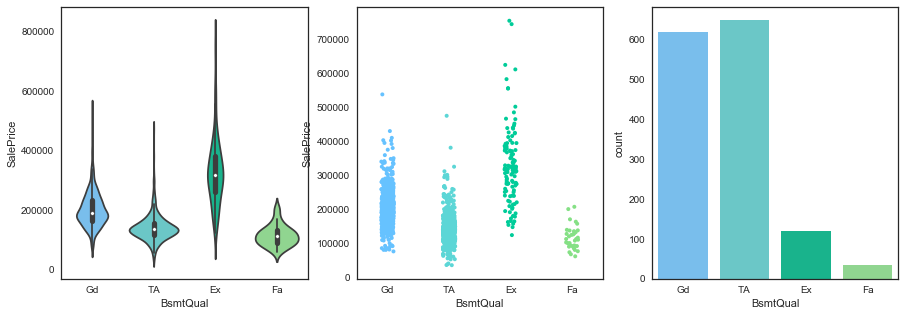

In [102]:
plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
sns.violinplot(x='BsmtQual', y='SalePrice', data=train)

plt.subplot(1,3,2)
sns.stripplot(x='BsmtQual', y='SalePrice', data=train, size=4, jitter=True)

plt.subplot(1,3,3)
sns.countplot(x='BsmtQual', data=train)

** Analysis:  
(1) fig1 and fig2 -->'SalePrice' is clearly affected by 'BsmtQual'   
(2) fig3 --> Most house bsmt belong to 'Gd', 'TA' type.**

** Strategy:  
Since this feature is ordinal, i.e. the categories represent different levels of order, I will replace the values by hand.**

In [103]:
all_data['BsmtQual'] = all_data['BsmtQual'].map({"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})
all_data['BsmtQual'].unique()

array([3, 2, 4, 0, 1])

- BsmtCond

Description : Evaluates the general condition of the basement.

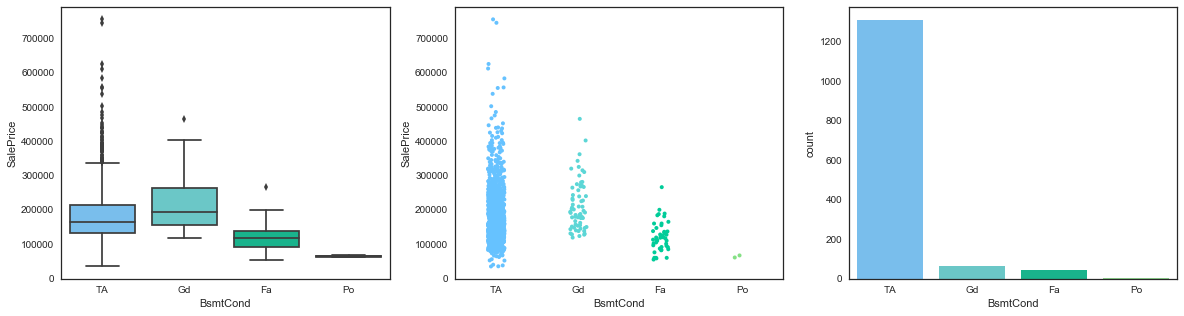

In [104]:
plt.subplots(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(x='BsmtCond', y='SalePrice', data=train)

plt.subplot(1,3,2)
sns.stripplot(x='BsmtCond', y='SalePrice', data=train, size=4, jitter=True)

plt.subplot(1,3,3)
sns.countplot(x='BsmtCond', data=train)

** Analysis:  
(1)  'SalePrice' is improving roughly with 'BsmtCond'  
(2) Most 'BsmtCond'  lies in 'TA' type**

** Strategy:
Since this feature is ordinal, i.e. the categories represent different levels of order, I will replace the values by hand.**

In [105]:
all_data['BsmtCond'] = all_data['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
all_data['BsmtCond'].unique()

array([3, 4, 0, 2, 1])

- BsmtExposure

Description: Refers to walkout or garden level walls

In [106]:
train['BsmtExposure'].describe()

count     1420
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

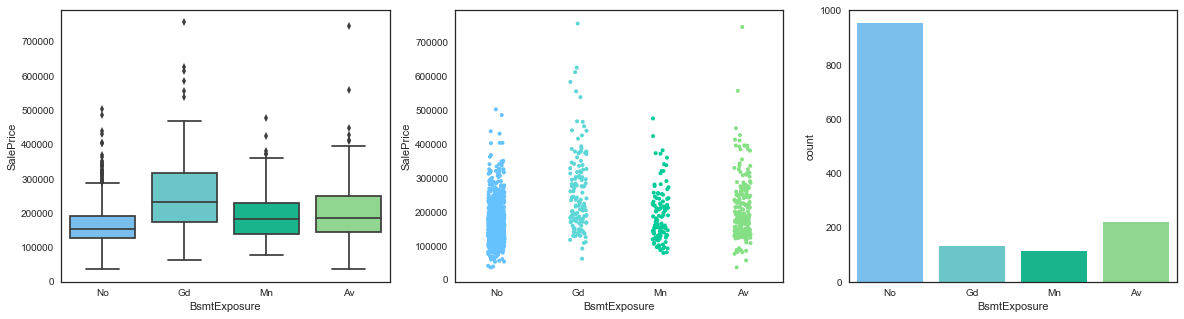

In [107]:
plt.subplots(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(x='BsmtExposure', y='SalePrice', data=train)

plt.subplot(1,3,2)
sns.stripplot(x='BsmtExposure', y='SalePrice', data=train, size=4, jitter=True)

plt.subplot(1,3,3)
sns.countplot(x='BsmtExposure', data=train)

** Analysis:  
(1) From this analysis I would say that it is positively correlating with SalePrice, but it isn't massively influential.  
(2) Most are belong to 'No' type**

** Strategy:  
Since this feature is ordinal, replace values by hand.**

In [108]:
all_data['BsmtExposure'] = all_data['BsmtExposure'].map({"None":0, "No":1, "Mn":2, "Av":3, "Gd":4})
all_data['BsmtExposure'].unique()

array([1, 4, 2, 3, 0])

- BsmtFinType1

Description: Rating of basement finished area

In [109]:
train['BsmtFinType1'].describe()

count     1421
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

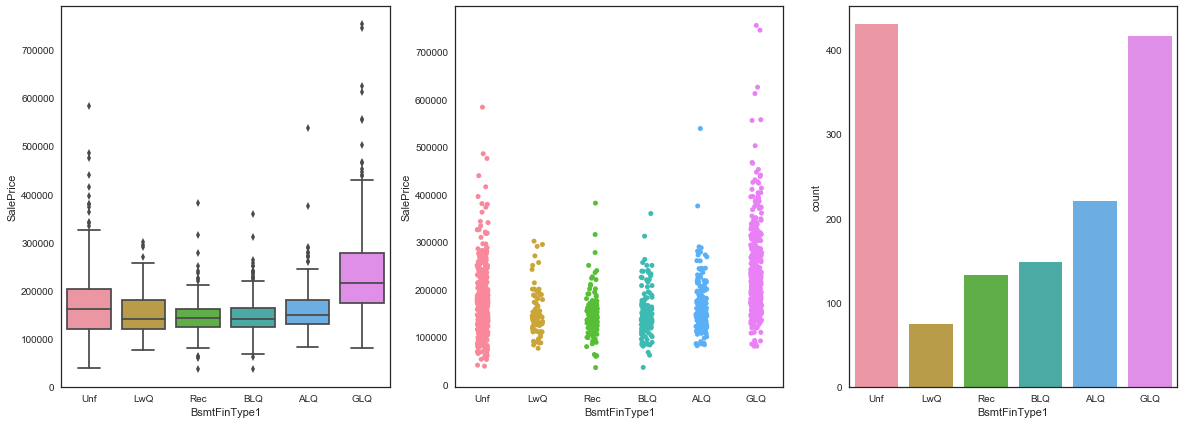

In [110]:
plt.subplots(figsize=(20,7))

plt.subplot(1,3,1)
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"])

plt.subplot(1,3,2)
sns.stripplot(x='BsmtFinType1', y='SalePrice', data=train, size=5, jitter=True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"])

plt.subplot(1,3,3)
sns.countplot(x='BsmtFinType1', data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"])


** Analysis:  
(1) This is very interesting, it seems as though houses with an unfinished basement on   average sold for more money than houses having up to an average rating...  
(2) However, houses with a good finish within the basement still demand more money than   unfinished ones.** 


**Strategy:  
 This is an ordinal feature, however as you can see this order does not necessarily   cause a higher SalePrice. By creating an ordinal variable it was suggest that as the order   of the feature increases then the target variable would also. We can see that this is   not the case. Therefore, I will create dummy variables from this feature.**

In [111]:
all_data = pd.get_dummies(data=all_data, columns=['BsmtFinType1'], prefix='BsmtFinType1')
all_data[:3]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF-Sq,OpenPorchSF-Sq,2ndFlrSF-Sq,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf
0,856,854,0,None,3,1Fam,3,1,706.0,0.0,...,0.000000,7.810250,29.223278,0,0,1,0,0,0,0
1,1262,0,0,None,3,1Fam,3,4,978.0,0.0,...,17.262677,0.000000,0.000000,1,0,0,0,0,0,0
2,920,866,0,None,3,1Fam,3,2,486.0,0.0,...,0.000000,6.480741,29.427878,0,0,1,0,0,0,0


- BsmtFinSF1

Description: Type 1 finished square feet.

In [112]:
train['BsmtFinSF1'].describe()

count    1458.000000
mean      438.827160
std       432.969094
min         0.000000
25%         0.000000
50%       382.000000
75%       711.000000
max      2188.000000
Name: BsmtFinSF1, dtype: float64

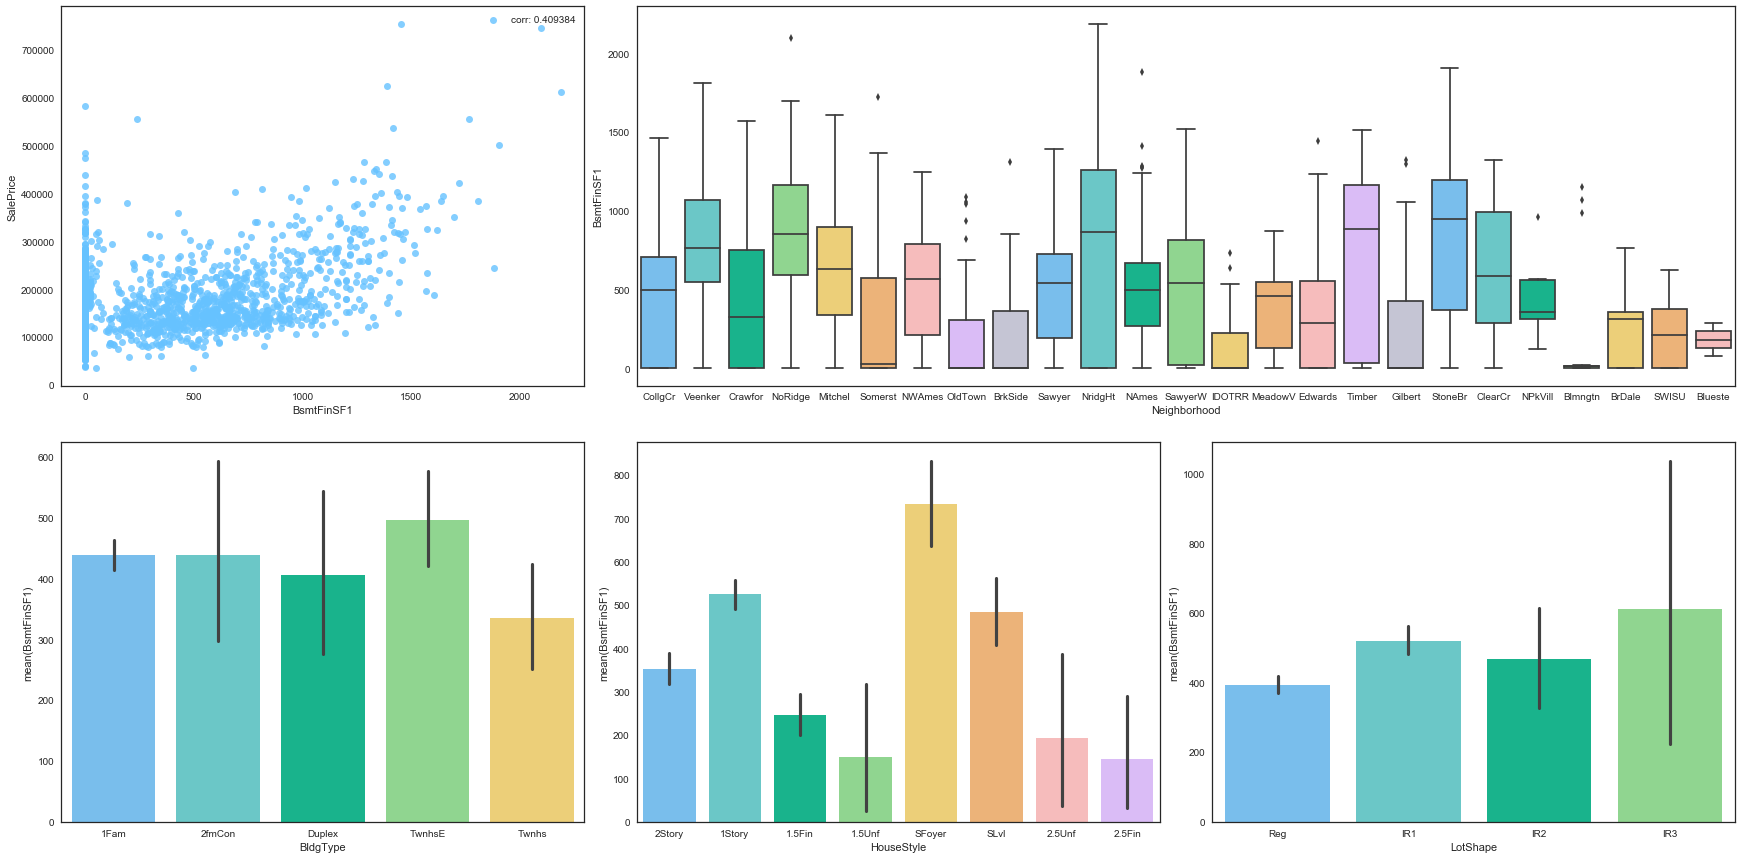

In [126]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=.15)
plt.subplots(figsize=(30,15))

plt.subplot(grid[0,0])
g = sns.regplot(x='BsmtFinSF1', y='SalePrice', data=train, fit_reg=False, label='corr: %2f'
            %(pearsonr(train['BsmtFinSF1'], train['SalePrice'])[0]))
g.legend(loc='best')

plt.subplot(grid[0, 1:])
sns.boxplot(x='Neighborhood', y='BsmtFinSF1', data=train, palette=mycols)

plt.subplot(grid[1,0])
sns.barplot(x='BldgType', y='BsmtFinSF1', data=train, palette=mycols)

plt.subplot(grid[1,1])
sns.barplot(x='HouseStyle', y='BsmtFinSF1', data=train, palette=mycols)

plt.subplot(grid[1,2])
sns.barplot(x='LotShape', y='BsmtFinSF1', data=train, palette=mycols)

** Analysis:  
(1)BsmtFinSF1 is a numerical feature  
(2)Saleprice and BsmtFinSF1 has a good linear relationship
(3)It is also clear that the local area (Neighborhood) and style of building (BldgType, HouseStyle and LotShape) has a varying effect on this feature.
**

** Strategy:  
Since this is a continuous numeric feature, I will bin this into several categories and create dummy features.**

In [114]:
pd.cut(all_data['BsmtFinSF1'], 4).unique()

[(-4.01, 1002.5], (1002.5, 2005.0], (2005.0, 3007.5], (3007.5, 4010.0]]
Categories (4, interval[float64]): [(-4.01, 1002.5] < (1002.5, 2005.0] < (2005.0, 3007.5] < (3007.5, 4010.0]]

In [115]:
all_data['BsmtFinSF1'].loc[all_data['BsmtFinSF1']<=1002.5] = 1
all_data['BsmtFinSF1'].loc[(all_data['BsmtFinSF1']>1002.5)&(all_data['BsmtFinSF1']<=2005.0)] = 2
all_data['BsmtFinSF1'].loc[(all_data['BsmtFinSF1']>2005)&(all_data['BsmtFinSF1']<=3007.5)] = 3
all_data['BsmtFinSF1'].loc[all_data['BsmtFinSF1']>3007.5] = 4

all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].astype(int)

all_data = pd.get_dummies(all_data, columns=['BsmtFinSF1'], prefix='BsmtFinSF1')

In [116]:
all_data[:3]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF2,BsmtFinType2,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_1,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4
0,856,854,0,None,3,1Fam,3,1,0.0,Unf,...,0,1,0,0,0,0,1,0,0,0
1,1262,0,0,None,3,1Fam,3,4,0.0,Unf,...,0,0,0,0,0,0,1,0,0,0
2,920,866,0,None,3,1Fam,3,2,0.0,Unf,...,0,1,0,0,0,0,1,0,0,0


- BasmtFinType2

In [119]:
all_data['BsmtFinType2'].describe()

count     2917
unique       7
top        Unf
freq      2491
Name: BsmtFinType2, dtype: object

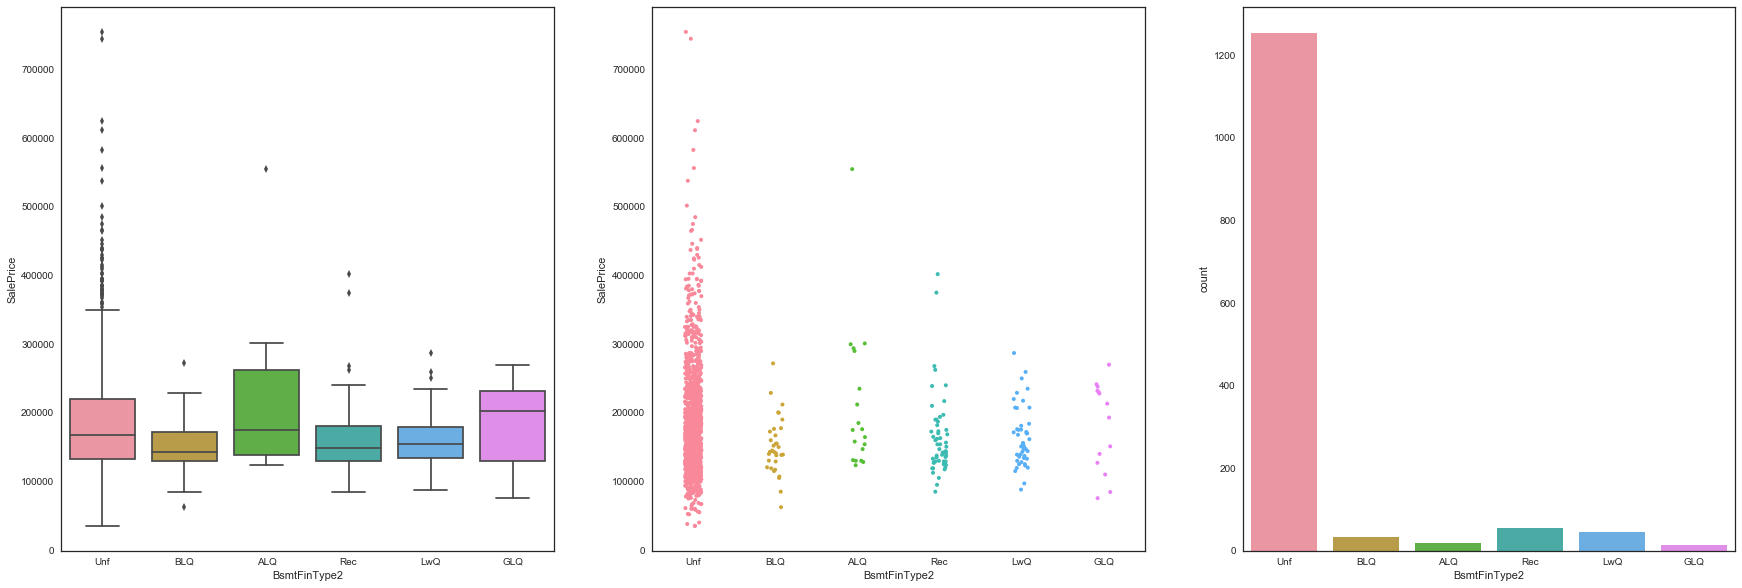

In [130]:
plt.subplots(figsize=(30, 10))

plt.subplot(1,3,1)
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=train)

plt.subplot(1,3,2)
sns.stripplot(x='BsmtFinType2', y='SalePrice', data=train, size=4, jitter=True)

plt.subplot(1,3,3)
sns.countplot(x='BsmtFinType2', data=train)

** Analysis:  
1.BsmtFinType2 do not affect much on SalePrice.  
2.MOst are Unfinshed bsmttype2 **

**Strategy:  
cerate dummy variables**

In [131]:
all_data = pd.get_dummies(all_data, columns=['BsmtFinType2'], prefix='BsmtFinType2')
all_data[:3]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF2,BsmtFullBath,...,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf
0,856,854,0,None,3,1Fam,3,1,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1262,0,0,None,3,1Fam,3,4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,920,866,0,None,3,1Fam,3,2,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


- BsmtFinSF2

In [132]:
all_data['BsmtFinSF2'].describe()

count    2917.000000
mean       49.599246
std       169.232130
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

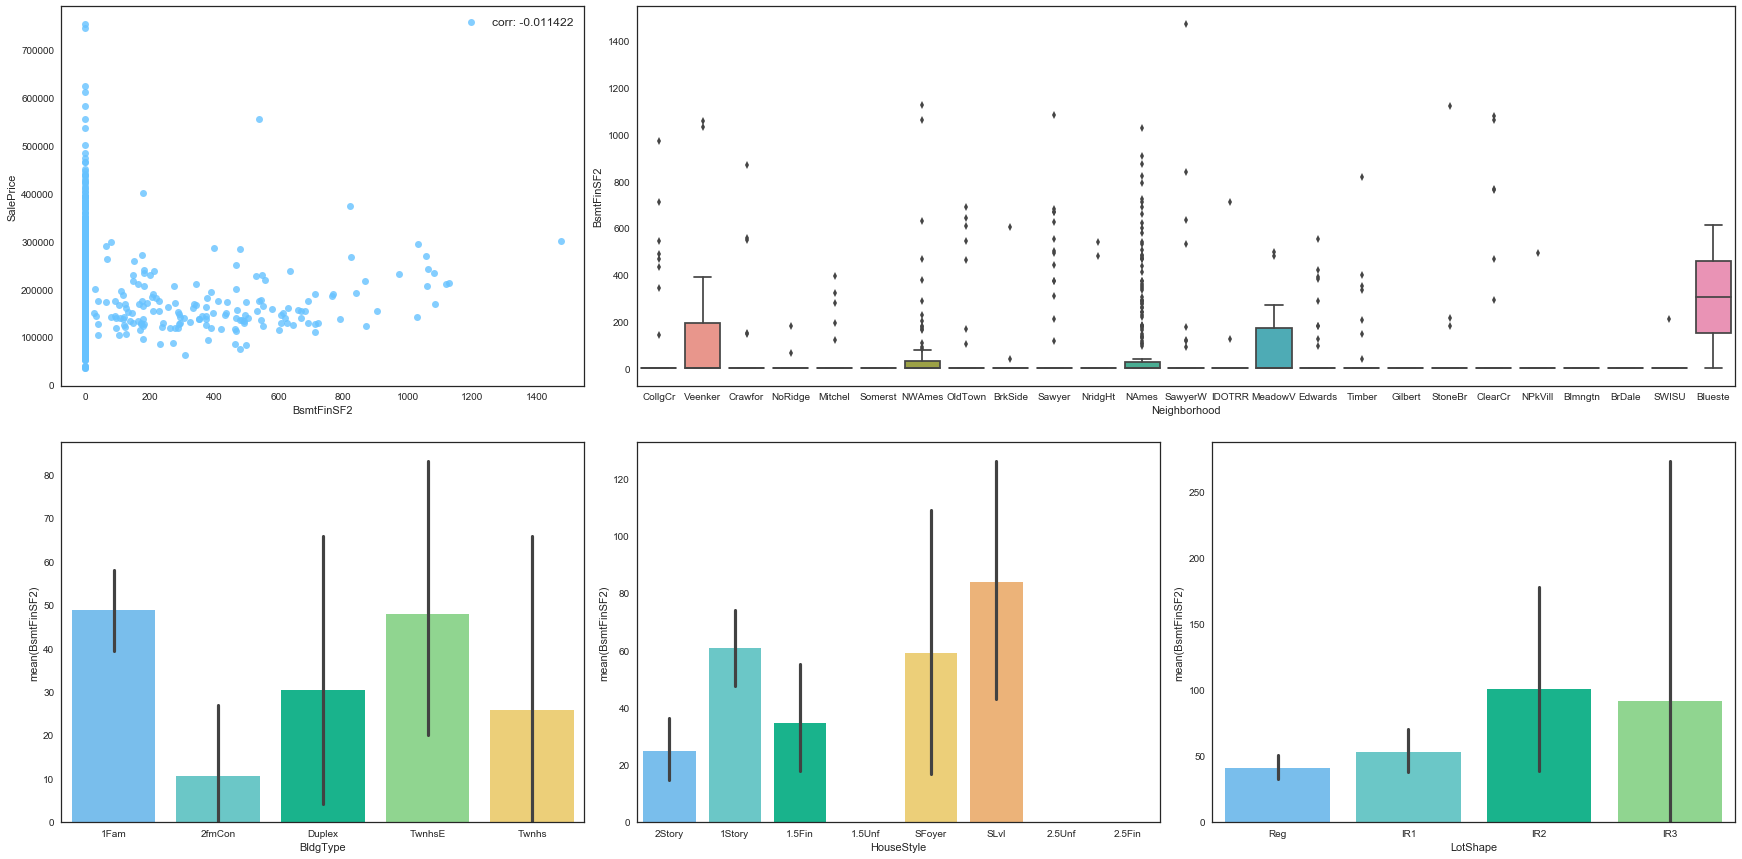

In [134]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize=(30,15))

plt.subplot(grid[0,0])
g = sns.regplot(x='BsmtFinSF2', y='SalePrice', data=train, fit_reg=False, label='corr: %2f'
               %(pearsonr(train['BsmtFinSF2'], train['SalePrice'])[0]))
g.legend(loc='best', fontsize=12)

plt.subplot(grid[0, 1:])
sns.boxplot(x='Neighborhood', y='BsmtFinSF2', data=train)

plt.subplot(grid[1, 0])
sns.barplot(x="BldgType", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 1])
sns.barplot(x="HouseStyle", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 2])
sns.barplot(x="LotShape", y="BsmtFinSF2", data=train, palette = mycols)

** Analysis:  
1.Numerical type  
2.corr=-0.01 -> none linear**

**Strategy:  
replace this feature with a flag.**

In [143]:
all_data['BsmtFinSF2_Flag'] = all_data['BsmtFinSF2'].map(lambda x:0 if x==0 else 1)
all_data.drop('BsmtFinSF2', axis=1, inplace=True)

- BsmtUnfSF

In [153]:
all_data['BsmtUnfSF'].describe()

count    2917.000000
mean      560.663696
std       439.579681
min         0.000000
25%       220.000000
50%       467.000000
75%       804.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

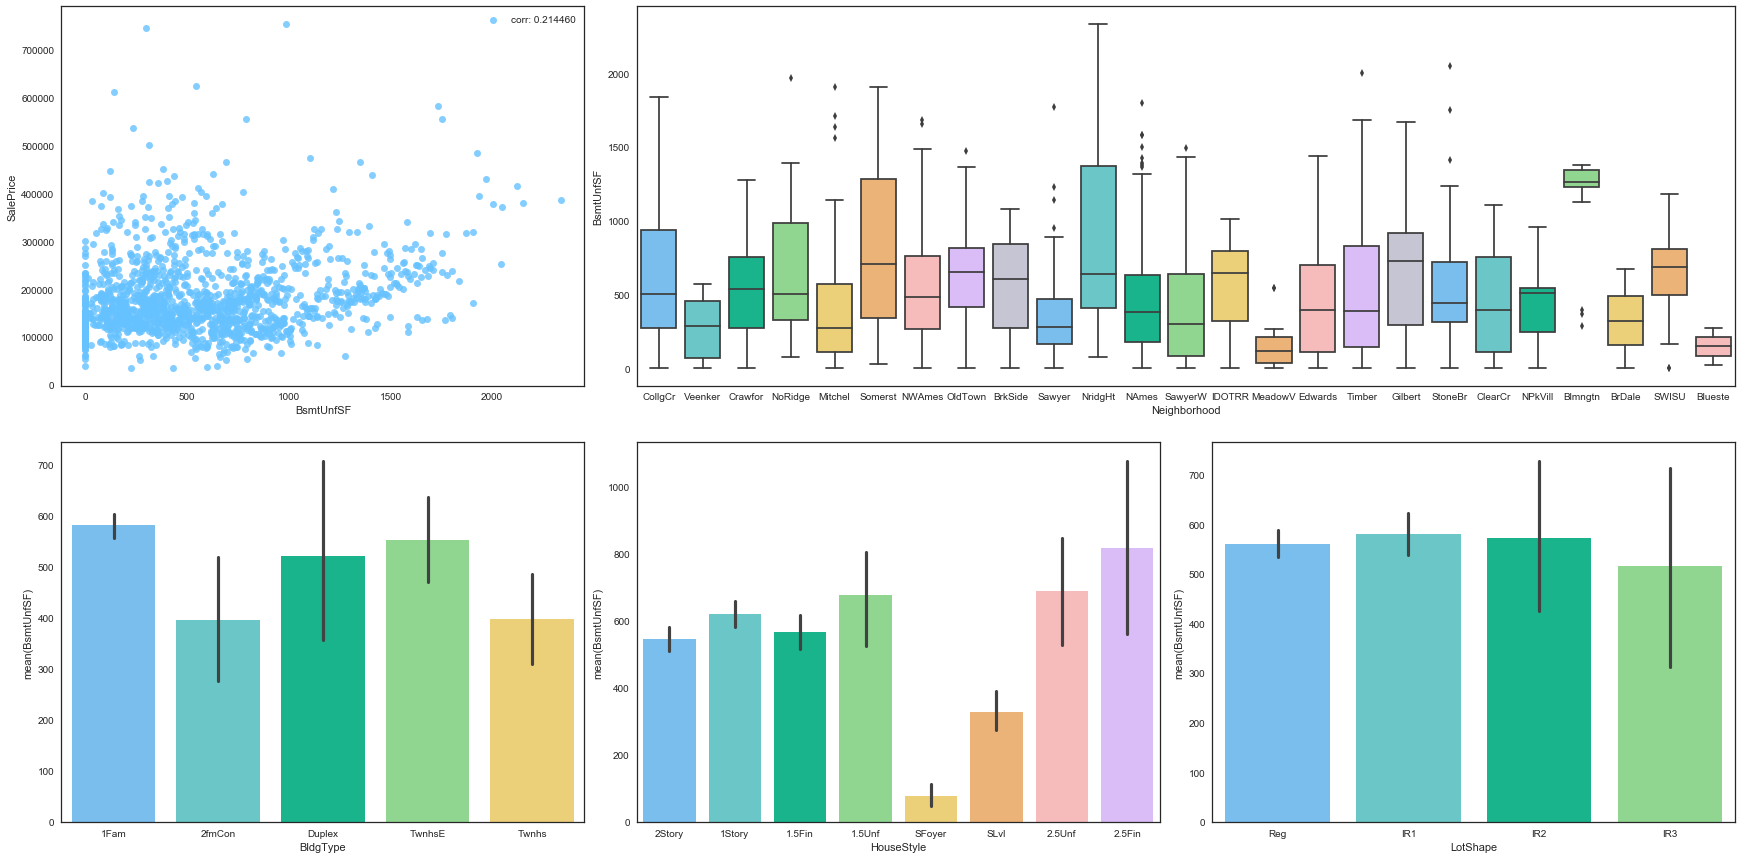

In [154]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtUnfSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtUnfSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtUnfSF", data=train, palette = mycols);